In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
np.random.seed(42) # Set a random seed for reproducibility
iris = load_iris(as_frame = True)
# all columns are measured in cm

In [3]:
X,y = iris.data,iris.target

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
y.value_counts()

,count
target,
0,50
1,50
2,50


### Bar Plot of Class Distribution
This bar plot visually represents the number of samples for each class. It confirms the balanced nature of the Iris dataset, with each species having an equal count.

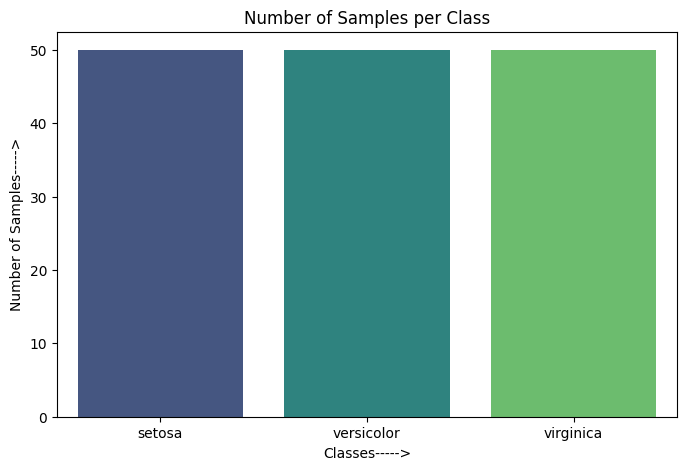

In [10]:
class_counts = y.value_counts().sort_index()
class_names = iris.target_names

plt.figure(figsize=(8, 5))
sns.barplot(x=class_names, y=class_counts, hue=class_names, palette='viridis', legend=False)
plt.title('Number of Samples per Class')
plt.xlabel('Classes----->')
plt.ylabel('Number of Samples----->')
plt.show()

### Feature Correlation Heatmap
This heatmap displays the correlation matrix of the features. It helps in understanding the linear relationships between different features, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative correlations. Features with high correlation might be redundant or indicative of collinearity.

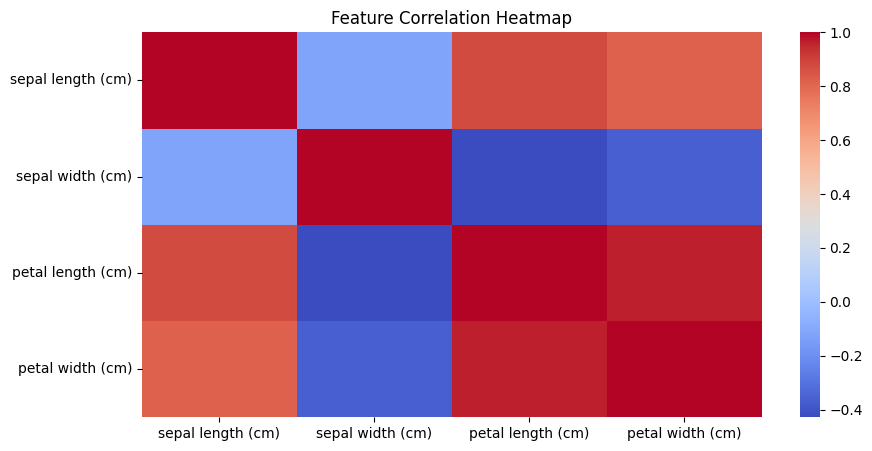

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

### Correlation of Features with Target
This bar plot shows the correlation of each feature with the target variable (`y`). A higher absolute correlation value suggests that the feature is more influential in determining the species. Note that `y` is encoded as 0, 1, 2, so this is an association rather than a true ordinal relationship.

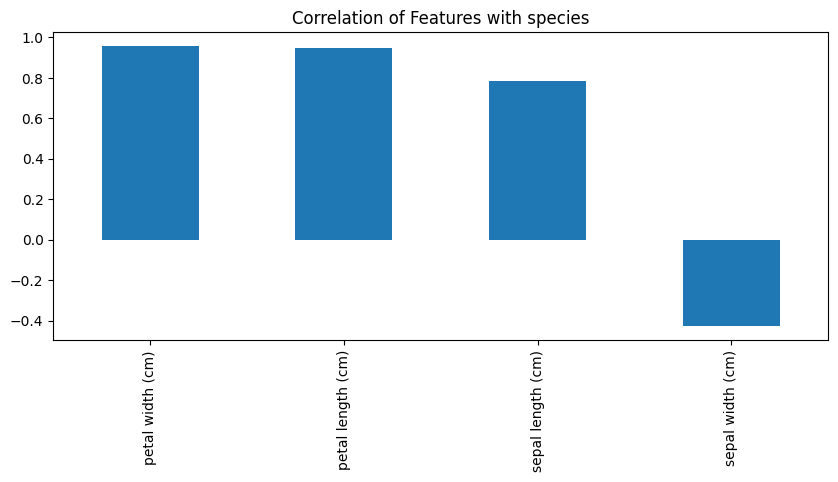

In [12]:
corr_with_target = X.corrwith(y) # Note: y encoded as 0,1,2 → this is a rough association, not a true ordinal relationship
corr_with_target.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title('Correlation of Features with species')
plt.show()

### Pair Plot of Iris Features by Species
A pair plot visualizes the relationships between all pairs of features, with points colored by species. This is a crucial step for exploratory data analysis, allowing us to observe distributions, identify clusters, and understand how well different features separate the classes.

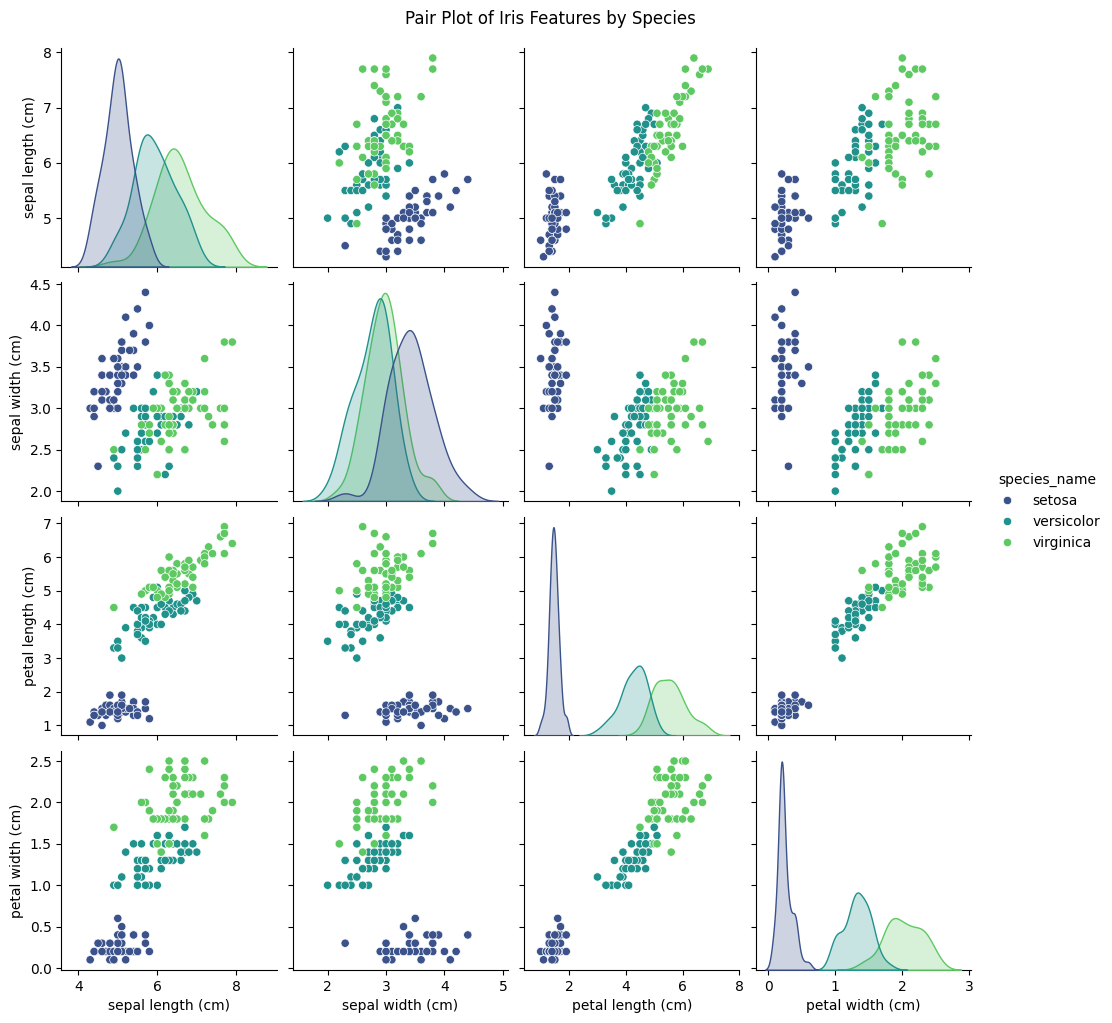

In [13]:
pairplot_data = X.copy()
# Map numerical target to class names for the legend
pairplot_data['species_name'] = y.map(dict(enumerate(iris.target_names)))
sns.pairplot(pairplot_data, hue='species_name', palette='viridis')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2,stratify = y)

### Class Distribution in Training and Test Sets
This bar chart confirms that the class distribution is consistent between the training and test sets due to stratification. Each class has a proportional number of samples in both sets, which is important for robust model evaluation.

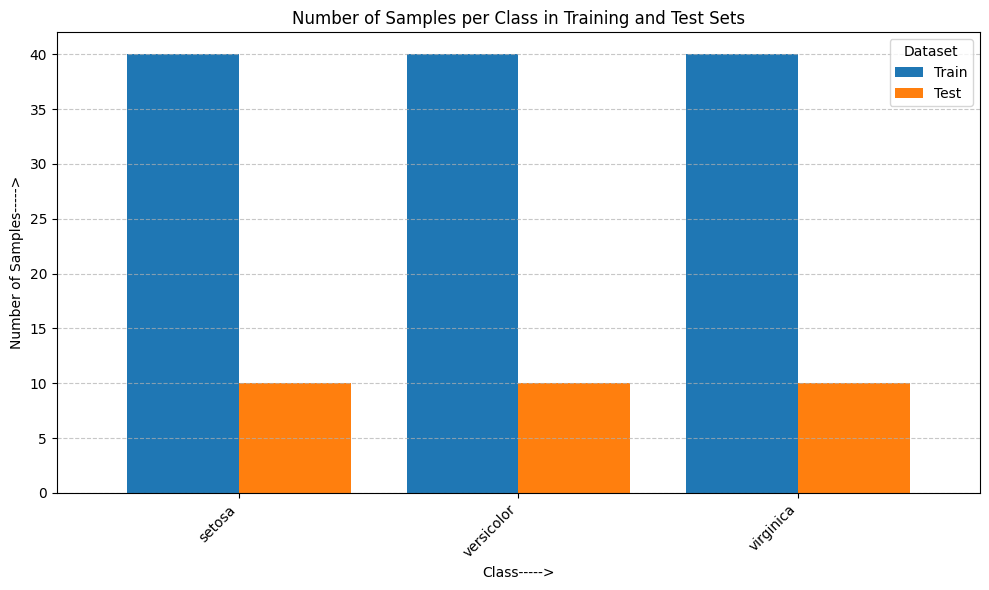

In [15]:
# Get class counts for training and test sets
train_class_counts = y_train.value_counts().sort_index()
test_class_counts = y_test.value_counts().sort_index()

# Create a DataFrame for plotting
class_distribution = pd.DataFrame({
    'Train': train_class_counts,
    'Test': test_class_counts
})

# Get class names for labels
class_names = iris.target_names

# Plotting the bar chart
class_distribution.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Number of Samples per Class in Training and Test Sets')
plt.xlabel('Class----->')
plt.ylabel('Number of Samples----->')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45, ha='right')
plt.legend(title='Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### One-vs-Rest (OvR) Target Preparation
For building OvR Perceptron classifiers, this cell transforms the multi-class target variable (`y_train`) into binary targets. For each class (0, 1, and 2), a new binary target is created where 1 indicates the presence of that class and 0 indicates its absence.

In [16]:
y0_train = (y_train == 0).astype(int)  # setosa vs rest
y1_train = (y_train == 1).astype(int)  # versicolor vs rest
y2_train = (y_train == 2).astype(int)  # virginica vs rest

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
perceptron_clf0 = make_pipeline(StandardScaler(),
                                Perceptron(random_state = 42,penalty='l2', alpha=1e-4))
perceptron_clf1 = make_pipeline(StandardScaler(),Perceptron(random_state = 42,penalty='l2', alpha=1e-4))
perceptron_clf2 = make_pipeline(StandardScaler(),Perceptron(random_state = 42,penalty='l2', alpha=1e-4))

### Training Perceptron Classifier for Class 0
The first Perceptron classifier (`perceptron_clf0`) is trained to identify class 0 (setosa) against all other classes.

In [18]:
perceptron_clf0.fit(X_train,y0_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron', Perceptron(penalty='l2', random_state=42))])

### Training Perceptron Classifier for Class 1
The second Perceptron classifier (`perceptron_clf1`) is trained to identify class 1 (versicolor) against all other classes.

In [19]:
perceptron_clf1.fit(X_train,y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron', Perceptron(penalty='l2', random_state=42))])

### Training Perceptron Classifier for Class 2
The third Perceptron classifier (`perceptron_clf2`) is trained to identify class 2 (virginica) against all other classes.

In [20]:
perceptron_clf2.fit(X_train,y2_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron', Perceptron(penalty='l2', random_state=42))])

In [21]:
from sklearn.model_selection import cross_val_score
cvs0 = cross_val_score(perceptron_clf0,X_train,y0_train,cv = 5,scoring = 'accuracy')
cvs0

array([1., 1., 1., 1., 1.])

In [22]:
cvs0.mean()*100

np.float64(100.0)

In [23]:
cvs1 = cross_val_score(perceptron_clf1,X_train,y1_train,cv = 5,scoring = 'accuracy')
cvs1

array([0.625     , 0.66666667, 0.70833333, 0.625     , 0.66666667])

In [24]:
cvs1.mean()*100

np.float64(65.83333333333333)

In [25]:
cvs2 = cross_val_score(perceptron_clf2,X_train,y2_train,cv = 5,scoring = 'accuracy')
cvs2

array([0.91666667, 0.95833333, 0.95833333, 0.95833333, 0.95833333])

In [26]:
cvs2.mean()*100

np.float64(95.0)

### Initializing Bagging Perceptron Classifier
This cell sets up a `BaggingClassifier` using the `Perceptron` as its base estimator. Bagging (Bootstrap Aggregating) is an ensemble method that trains multiple base models on different subsets of the training data and averages their predictions to reduce variance and prevent overfitting. Here, 10 Perceptron estimators are used, each trained on bootstrapped samples.

In [27]:
from sklearn.ensemble import BaggingClassifier
base_perceptron_estimator = make_pipeline(
    StandardScaler(),
    Perceptron(random_state=42, penalty='l2', alpha=1e-4)
)

bagging_clf = BaggingClassifier(
    estimator=base_perceptron_estimator,
    n_estimators=10, # Number of Perceptrons in the ensemble
    max_samples=1.0, # Use all samples for each base estimator (bootstrapping handles sampling)
    max_features=1.0, # Use all features for each base estimator
    bootstrap=True, # Samples are drawn with replacement
    random_state=42,
    n_jobs = -1

)

In [28]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=Pipeline(steps=[('standardscaler',
                                             StandardScaler()),
                                            ('perceptron',
                                             Perceptron(penalty='l2',
                                                        random_state=42))]),
                  n_jobs=-1, random_state=42)

In [29]:
bagging_clf_cvs = cross_val_score(bagging_clf,X_train,y_train,cv = 5,scoring = 'accuracy',n_jobs = -1)
bagging_clf_cvs*100

array([ 91.66666667,  91.66666667,  91.66666667,  87.5       ,
       100.        ])

In [30]:
bagging_clf_cvs.mean()*100

np.float64(92.5)

### Feature Importance for Bagging Perceptron Classifier

Since `BaggingClassifier` does not directly provide `feature_importances_`, we need to extract the coefficients from each individual `Perceptron` estimator within the ensemble. The coefficients (`coef_`) of a Perceptron represent the weights assigned to each feature. By taking the absolute value of these coefficients, summing them across the different classes (for multi-class Perceptrons), and then averaging these sums across all base estimators in the bagging ensemble, we can derive a measure of feature importance.

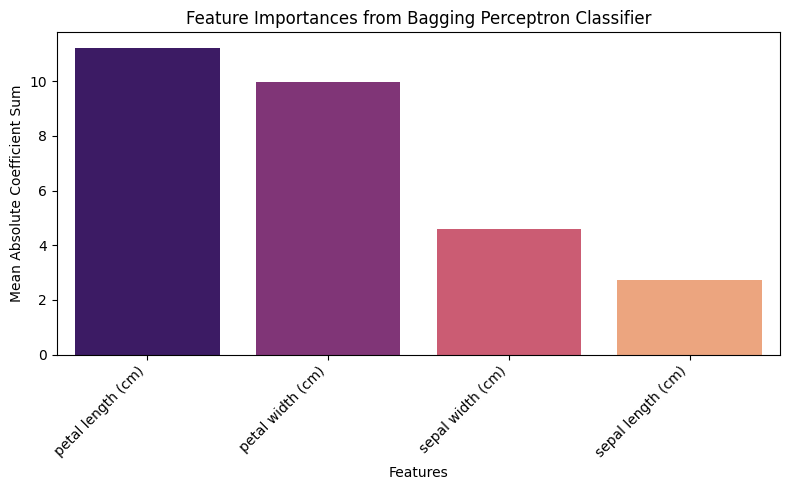

In [31]:
all_coefs = []
for estimator_pipeline in bagging_clf.estimators_:
    # Access the Perceptron model within the pipeline
    perceptron_model = estimator_pipeline.named_steps['perceptron']

    # For multi-class Perceptron, coef_ has shape (n_classes, n_features).
    # We take the absolute value and sum across classes to get a single importance per feature
    all_coefs.append(np.sum(np.abs(perceptron_model.coef_), axis=0))

# Average the summed absolute coefficients across all estimators
feature_importances = np.mean(all_coefs, axis=0)

# Create a Series for better handling and plotting, using original feature names
feature_names = X.columns
feature_importance_series = pd.Series(feature_importances, index=feature_names)

# Sort the importances for better visualization
feature_importance_series.sort_values(ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance_series.index, y=feature_importance_series.values, hue=feature_importance_series.index, palette='magma', legend=False)
plt.title('Feature Importances from Bagging Perceptron Classifier')
plt.xlabel('Features')
plt.ylabel('Mean Absolute Coefficient Sum')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Learning Curves (Bagging Perceptron)

Learning curves are plots that show the model's performance on both the training and cross-validation sets as the training set size increases. They are crucial for diagnosing common machine learning problems such as high bias (underfitting) or high variance (overfitting).

*   **High Bias (Underfitting)**: If both the training and cross-validation scores are low and converge to a similar low value, it indicates that the model is too simple for the data and is underfitting. Increasing the training data size won't help much in this scenario.
*   **High Variance (Overfitting)**: If the training score is high and the cross-validation score is low, with a significant gap between them, it suggests that the model is overfitting the training data. As the training set size increases, this gap might decrease, indicating the model is starting to generalize better. Providing more training data or regularization can help address high variance.
*   **Good Fit**: Ideally, both scores should be high and converge to a narrow gap, indicating a well-generalized model.

For our Bagging Perceptron Classifier, analyzing learning curves will help us understand if the ensemble is effectively reducing variance (which is a primary goal of bagging) and if the base perceptron estimators are sufficiently complex to capture the underlying patterns without over- or underfitting.

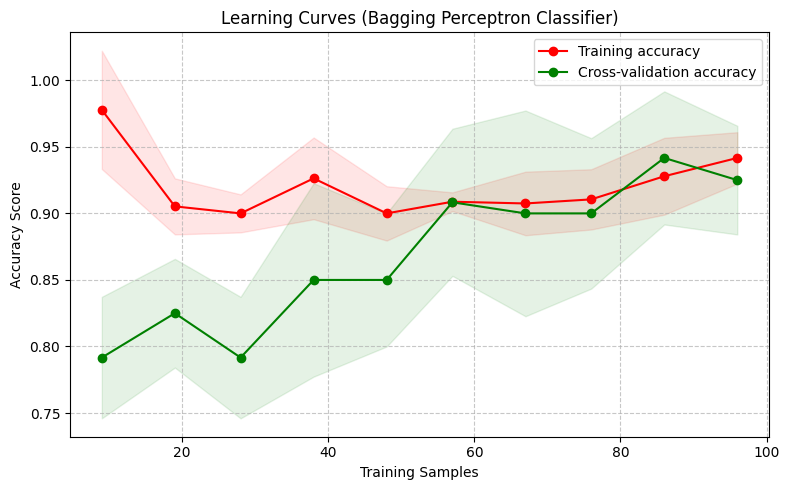

In [32]:
from sklearn.model_selection import learning_curve

# Define the number of samples to use for training at each step
train_sizes, train_scores, test_scores = learning_curve(
    bagging_clf, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.title('Learning Curves (Bagging Perceptron Classifier)')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy Score')
plt.grid(True, linestyle='--', alpha=0.7)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation accuracy")

plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Validation Curves (Bagging Perceptron - Alpha Hyperparameter)

Validation curves are a powerful tool for visualizing how a model's performance changes with respect to a single hyperparameter. They help in understanding the trade-off between bias and variance and identifying optimal hyperparameter values.

In this section, we will plot validation curves for the `alpha` hyperparameter of the `Perceptron` estimator, which is nested within our `BaggingClassifier`. The `alpha` hyperparameter in `Perceptron` controls the regularization strength (`penalty='l2'` in our case). Regularization helps prevent overfitting by penalizing large weights.

### Importance of Validation Curves:
*   **Optimal Hyperparameter Selection**: By plotting training and validation scores against a range of hyperparameter values, we can identify the sweet spot where the model performs best on unseen data.
*   **Diagnosing Overfitting and Underfitting**:
    *   **Underfitting (High Bias)**: If both training and validation scores are low for a given hyperparameter range, it indicates the model is too simple.
    *   **Overfitting (High Variance)**: If the training score is high but the validation score is significantly lower, the model is likely overfitting the training data.
    *   **Good Fit**: Ideally, both scores are high and close to each other.

For our `BaggingClassifier` with `Perceptron` estimators, analyzing the `alpha` parameter's effect through validation curves will show us how changes in regularization impact the ensemble's ability to generalize. A well-tuned `alpha` can improve the performance of individual Perceptrons, consequently enhancing the overall ensemble performance.

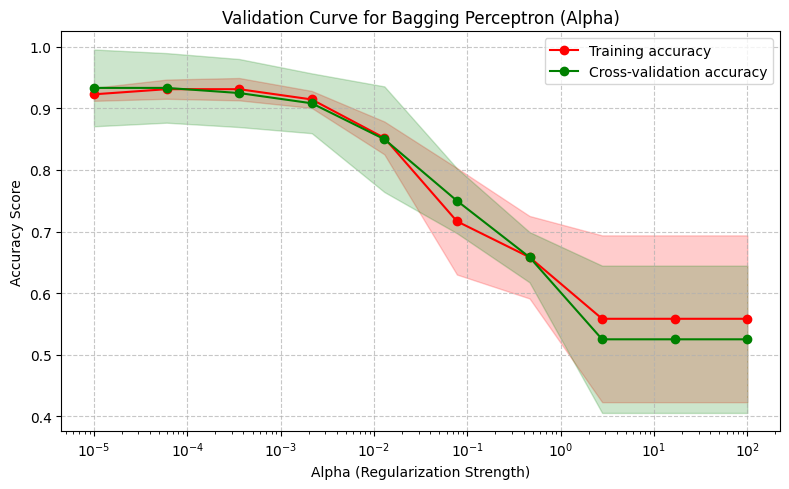

In [33]:
from sklearn.model_selection import validation_curve

# Define the range of alpha values to evaluate (logarithmic scale)
alpha_range = np.logspace(-5, 2, 10)  # From 1e-5 to 1e2, 10 points

# Calculate training and test scores for different alpha values
# The 'param_name' needs to correctly access the alpha parameter within the pipeline of the base estimator
# 'estimator__' refers to the base_perceptron_estimator within BaggingClassifier
# 'perceptron__' refers to the Perceptron step within that pipeline
train_scores, test_scores = validation_curve(
    bagging_clf, X_train, y_train, param_name='estimator__perceptron__alpha',
    param_range=alpha_range, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 5))
plt.title('Validation Curve for Bagging Perceptron (Alpha)')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Accuracy Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.semilogx(alpha_range, train_scores_mean, label='Training accuracy', color='r', marker='o')
plt.fill_between(alpha_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='r')
plt.semilogx(alpha_range, test_scores_mean, label='Cross-validation accuracy', color='g', marker='o')
plt.fill_between(alpha_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='g')

plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [34]:
y_pred = bagging_clf.predict(X_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 0])

In [35]:
y_probabilities = bagging_clf.predict_proba(X_test)
y_probabilities

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0.1, 0.9, 0. ],
       [0.1, 0.9, 0. ],
       [1. , 0. , 0. ],
       [0.3, 0.4, 0.3],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0.3, 0.7, 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0.4, 0.6, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [0.3, 0.7, 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

93.33333333333333

### Precision Score
This calculates the weighted average precision score on the test set. Precision measures the proportion of positive identifications that were actually correct.

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,average = 'weighted')*100

93.33333333333333

### Recall Score
This calculates the weighted average recall score on the test set. Recall measures the proportion of actual positives that were identified correctly.

In [38]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred,average = 'weighted')*100

93.33333333333333

### F1-Score
This calculates the weighted average F1-score on the test set. The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both.

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average = 'weighted')*100

93.33333333333333

## Precision-Recall Curve (One-vs-Rest)

This section visualizes the Precision-Recall (PR) curve for each class, employing a one-vs-rest strategy. The PR curve illustrates the trade-off between precision (the proportion of true positive predictions among all positive predictions) and recall (the proportion of true positive predictions among all actual positive instances) across various classification thresholds. This plot is particularly useful when dealing with imbalanced datasets, where one class is significantly less frequent than others. A model that performs well on an imbalanced dataset will have a PR curve that stays close to the top-right corner, indicating high precision and high recall.

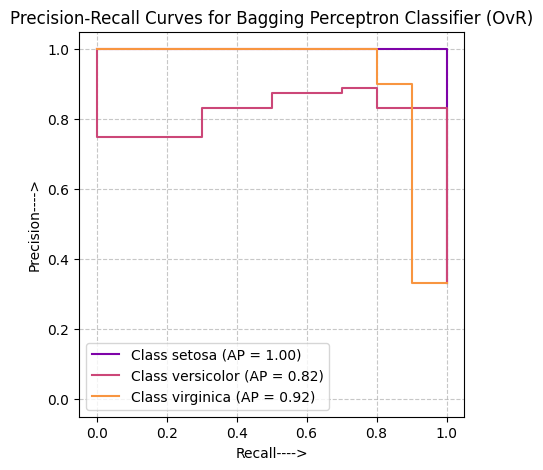

In [40]:
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(6, 5))
ax = plt.gca()

colors = sns.color_palette('plasma', n_colors=len(iris.target_names)) # Changed color palette to 'plasma'

# Loop through each class to generate a Precision-Recall curve (one-vs-rest)
for i, class_name in enumerate(iris.target_names):
    # Create binary true labels for the current class (1 if it's the class, 0 otherwise)
    y_test_binary = (y_test == i).astype(int)

    # Extract the predicted probabilities for the current class
    prob_pos = y_probabilities[:, i]

    # Plot the Precision-Recall curve for the current class
    PrecisionRecallDisplay.from_predictions(
        y_test_binary, prob_pos, name=f"Class {class_name}", ax=ax, color=colors[i]
    )

plt.title('Precision-Recall Curves for Bagging Perceptron Classifier (OvR)')
plt.xlabel('Recall---->')
plt.ylabel('Precision---->')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probabilities, multi_class='ovr', average='weighted')

np.float64(0.965)

## ROC Curve (One-vs-Rest)

This section visualizes the Receiver Operating Characteristic (ROC) curve for each class, employing a one-vs-rest strategy. This plot is essential for understanding the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) for our Bagging Perceptron Classifier across different classification thresholds.

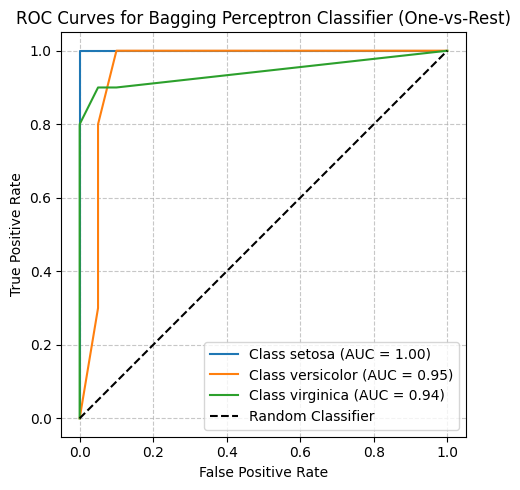

In [42]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(6, 5))
ax = plt.gca()

# Loop through each class to generate an ROC curve (one-vs-rest)
for i, class_name in enumerate(iris.target_names):
    # Create binary true labels for the current class (1 if it's the class, 0 otherwise)
    y_test_binary = (y_test == i).astype(int)

    # Extract the predicted probabilities for the current class
    prob_pos = y_probabilities[:, i]

    # Plot the ROC curve for the current class
    RocCurveDisplay.from_predictions(
        y_test_binary, prob_pos, name=f"Class {class_name}", ax=ax
    )

# Add a diagonal dashed line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('ROC Curves for Bagging Perceptron Classifier (One-vs-Rest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Log Loss
This calculates the log loss (or cross-entropy loss) of the model's predictions on the test set. Log loss quantifies the accuracy of a prediction by penalizing false classifications based on probability; a lower log loss indicates better probability predictions.

In [43]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probabilities)

1.3571510408282468

### Cohen's Kappa Score
This calculates Cohen's Kappa, a robust statistic that measures the agreement between two raters (in this case, true labels and predicted labels). It is generally considered a more robust measure than simple accuracy, as it takes into account the possibility of the agreement occurring by chance. A higher Kappa score indicates better agreement.

In [44]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_pred)

np.float64(0.9)

### Matthews Correlation Coefficient (MCC)
This calculates the Matthews Correlation Coefficient (MCC), a robust statistical measure that considers all four confusion matrix values (true positives, true negatives, false positives, and false negatives). MCC is a balanced measure that can be used even if the classes are of very different sizes, providing a reliable metric for multi-class classification.

In [45]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test,y_pred)

np.float64(0.9)

### Top-K Accuracy Score
This calculates the top-k accuracy score (here, k=2) for the model's predictions on the test set. Top-k accuracy checks if the true label is among the top-k predicted probabilities, which is useful in scenarios where providing a few highly probable predictions is acceptable.

In [46]:
from sklearn.metrics import top_k_accuracy_score
top_k_accuracy_score(y_test, y_probabilities, k=2)*100

np.float64(100.0)

### Calibration Plot (Reliability Diagram)

A calibration plot, or reliability diagram, assesses how well the predicted probabilities of a classifier match the true likelihood of an event. A perfectly calibrated model's predictions would fall along the diagonal line, meaning if it predicts a 70% chance of an event, that event actually occurs 70% of the time. We'll generate a plot for each class in a one-vs-rest fashion.

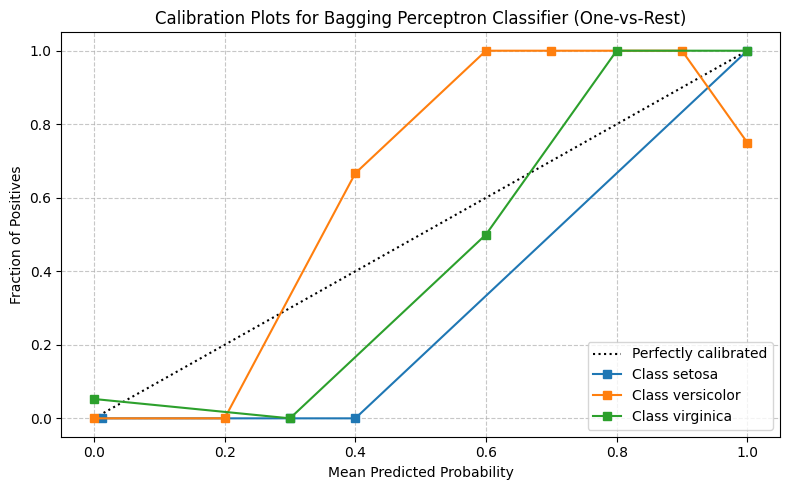

In [47]:
from sklearn.calibration import CalibrationDisplay

plt.figure(figsize=(8, 5))

# Loop through each class to generate a calibration plot (one-vs-rest)
for i, class_name in enumerate(iris.target_names):
    # Create binary true labels for the current class (1 if it's the class, 0 otherwise)
    y_test_binary = (y_test == i).astype(int)

    # Get the predicted probabilities for the current class
    prob_pos = y_probabilities[:, i]

    # Plot the calibration curve for the current class
    CalibrationDisplay.from_predictions(
        y_test_binary, prob_pos, n_bins=10, ax=plt.gca(), name=f"Class {class_name}"
    )

plt.title('Calibration Plots for Bagging Perceptron Classifier (One-vs-Rest)')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Decision Boundary Plot for Top 2 Features

To visualize the decision boundary, we will focus on the two most important features identified: 'petal length (cm)' and 'petal width (cm)'. We'll train a `BaggingClassifier` specifically on these two features and then plot the regions where the model predicts each of the three Iris species. The actual test data points will be overlaid to see how they fall within these regions.

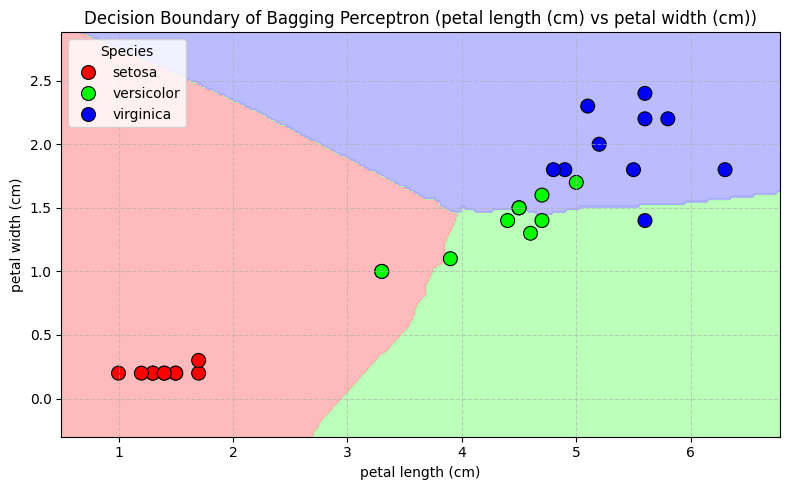

In [48]:
from matplotlib.colors import ListedColormap

# Select the two most important features
feature1_name = 'petal length (cm)'
feature2_name = 'petal width (cm)'

X_plot = X_test[[feature1_name, feature2_name]]
y_plot = y_test

# Get the indices of these features from the original X
# Prepare training data with only these two features for a specialized model
X_train_2features_np = X_train[[feature1_name, feature2_name]].to_numpy() # Convert to NumPy array
y_train_2features = y_train

# Re-create and train the BaggingClassifier specifically for these two features
base_perceptron_estimator_2f = make_pipeline(
    StandardScaler(),
    Perceptron(random_state=42, penalty='l2', alpha=1e-4)
)
bagging_clf_2f = BaggingClassifier(
    estimator=base_perceptron_estimator_2f,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
bagging_clf_2f.fit(X_train_2features_np, y_train_2features) # Fit with NumPy array

# Create meshgrid for plotting decision boundaries
x_min, x_max = X_plot.iloc[:, 0].min() - 0.5, X_plot.iloc[:, 0].max() + 0.5
y_min, y_max = X_plot.iloc[:, 1].min() - 0.5, X_plot.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the meshgrid
Z = bagging_clf_2f.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 5))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot also the test points
ax = sns.scatterplot(x=X_plot.iloc[:, 0], y=X_plot.iloc[:, 1], hue=y_plot,
                palette=cmap_bold.colors, alpha=1.0, edgecolor='k',
                s=100, legend='full')

# Get legend handles from the scatterplot
handles, _ = ax.get_legend_handles_labels()

# Create a new legend using the obtained handles and target names
# Convert iris.target_names to a list to resolve the ValueError
ax.legend(handles=handles, labels=list(iris.target_names), title='Species', loc='upper left')

plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title(f'Decision Boundary of Bagging Perceptron ({feature1_name} vs {feature2_name})')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

### Confusion Matrix
This calculates the confusion matrix for the model's predictions on the test set. The confusion matrix is a table that describes the performance of a classification model, showing the number of true positive, true negative, false positive, and false negative predictions.

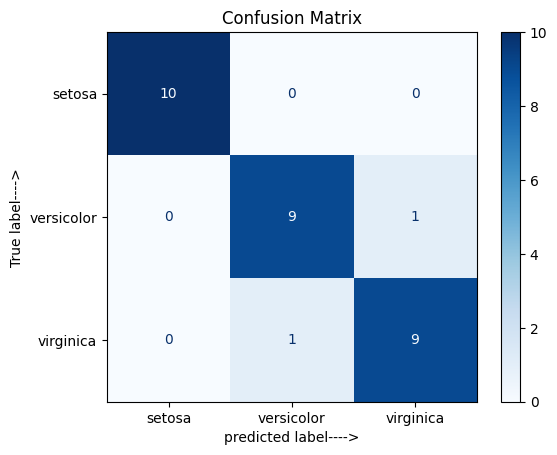

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm,display_labels = iris.target_names)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('predicted label---->')
plt.ylabel('True label---->')
plt.show()

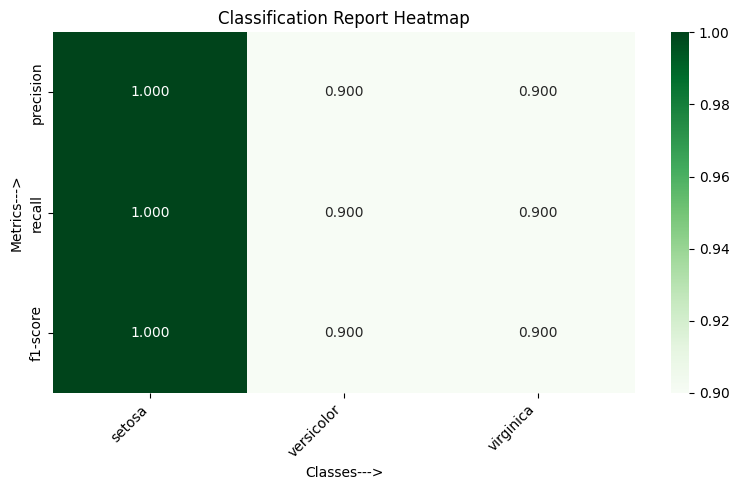

In [51]:
from sklearn.metrics import classification_report

clf_report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
clf_df = pd.DataFrame(clf_report_dict).transpose()

# Extract only the class-specific metrics (excluding accuracy, macro avg, weighted avg and support)
df_class_metrics = clf_df.iloc[:len(iris.target_names), :-1] # Exclude 'support' column

# Transpose to have metrics as rows and classes as columns for x-axis labeling
df_for_heatmap = df_class_metrics.T

# Rename columns (which are now class labels) to actual class names
df_for_heatmap.columns = iris.target_names

plt.figure(figsize=(8, 5))
sns.heatmap(df_for_heatmap, annot=True, cmap='Greens', fmt=".3f")
plt.title('Classification Report Heatmap')
plt.xlabel('Classes--->') # X-axis now represents classes
plt.ylabel('Metrics--->') # Y-axis represents metrics
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

### Normalized Confusion Matrix (Misclassification Heatmap)

To explicitly visualize misclassifications and their proportions, we can plot a normalized confusion matrix. This matrix shows the percentage of instances from each true class that were correctly or incorrectly classified. Normalizing by the true label (rows) helps to easily identify which classes are most prone to being misclassified and into which other classes they are erroneously predicted.

### Plotting Normalized Confusion Matrix
This cell displays a normalized confusion matrix, where each row sums to 1. This visualization explicitly shows the proportion of instances from each true class that were correctly or incorrectly classified, making misclassification patterns more apparent.

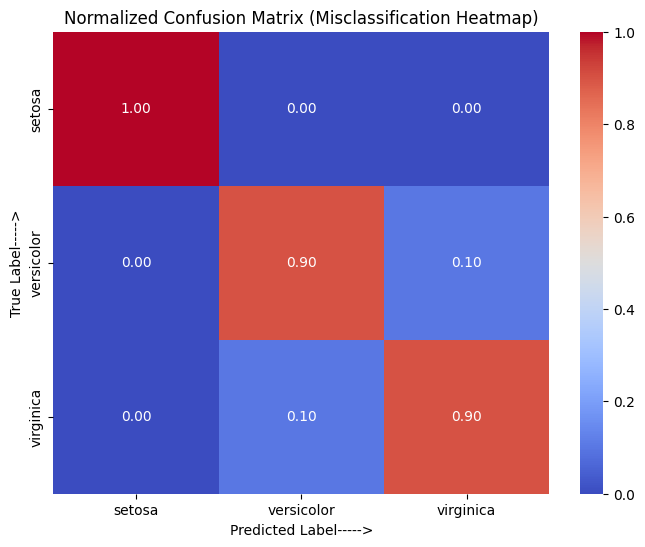

In [52]:
# Normalize the confusion matrix by the true labels (rows)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Normalized Confusion Matrix (Misclassification Heatmap)')
plt.xlabel('Predicted Label----->')
plt.ylabel('True Label----->')
plt.show()

In [54]:
import joblib
# Save the trained bagging_clf model using joblib
joblib.dump(bagging_clf, 'bagging_perceptron_model.joblib')
print(f"Model saved successfully as 'bagging_perceptron_model.joblib'")

Model saved successfully as 'bagging_perceptron_model.joblib'
